# Visualize

# Import

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np
import os
from datetime import datetime
from matplotlib import patheffects
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

In [2]:
# Pfad
TEMP_PATH = os.path.join("..", "temp")

In [3]:
# Daten einlesen
alt_parteien = pd.read_pickle(os.path.join(TEMP_PATH, "große.pickle"))
neue_parteien = pd.read_pickle(os.path.join(TEMP_PATH, "kleine.pickle"))
wahlen_df = pd.read_pickle(os.path.join(TEMP_PATH, "wahlen.pickle"))

In [4]:
# Liste der Parteifarben
parteifarben = {'cdu': 'black', 'spd': 'red', 'grüne': 'green','grünen': 'green',
                'fdp': '#DAA520', 'linke': 'purple', 'afd': 'blue'}

# Inspect

In [5]:
alt_parteien.head()

,date,word,count,month,quarter
1,2021-04-01,cdu,43,2021-04,2021Q2
5,2021-04-01,spd,7,2021-04,2021Q2
7,2021-04-02,cdu,71,2021-04,2021Q2
11,2021-04-02,spd,10,2021-04,2021Q2
13,2021-04-03,cdu,47,2021-04,2021Q2


In [6]:
neue_parteien.head()

,date,word,count,month,quarter
0,2021-04-01,afd,8,2021-04,2021Q2
3,2021-04-01,grünen,20,2021-04,2021Q2
6,2021-04-02,afd,10,2021-04,2021Q2
9,2021-04-02,grünen,24,2021-04,2021Q2
12,2021-04-03,afd,8,2021-04,2021Q2


In [7]:
wahlen_df.head()

,date,cdu,spd,grüne,fdp,linke,afd,quarter,month
0,2021-04-16,31,14,21,9,7,11,2021Q2,2021-04
1,2021-05-07,25,14,26,10,7,11,2021Q2,2021-05
2,2021-05-21,24,14,25,11,7,11,2021Q2,2021-05
3,2021-06-10,28,15,22,10,7,11,2021Q2,2021-06
4,2021-06-25,29,14,22,10,7,10,2021Q2,2021-06


# CDU und SPD Plott

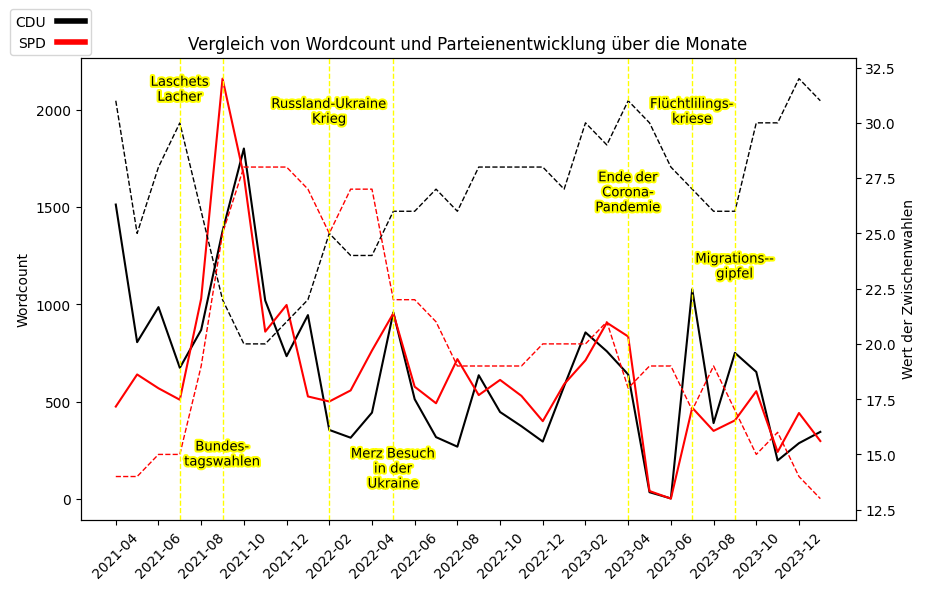

In [8]:
# Erstellen der Plot-Figur
plt.figure(figsize=(10, 6))
ax1 = plt.gca()  # ax1 als linke y-Achse

# Daten vorbereiten für den ersten Plot (Wordcount)
df_grouped_wordcount = pd.DataFrame()
for word in alt_parteien['word'].unique():
    temp_df = alt_parteien[alt_parteien['word'] == word].groupby('month').agg({'count': 'sum'}).reset_index()
    temp_df['word'] = word
    df_grouped_wordcount = pd.concat([df_grouped_wordcount, temp_df], ignore_index=True)

# Erster Plot (wordcount)
for word in df_grouped_wordcount['word'].unique():
    temp_df = df_grouped_wordcount[df_grouped_wordcount['word'] == word]
    color = parteifarben.get(word, 'black')
    ax1.plot(temp_df['month'], temp_df['count'], linestyle='-', color=color)

ax1.set_xlabel('')
ax1.set_ylabel('Wordcount')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(df_grouped_wordcount['month'].unique())
ax1.set_xticklabels(df_grouped_wordcount['month'].unique(), rotation=45)

# Jedes zweite Datum auf der x-Achse anzeigen
unique_months = df_grouped_wordcount['month'].unique()
ax1.set_xticks(unique_months[::2])
ax1.set_xticklabels(unique_months[::2], rotation=45)

# Daten vorbereiten für den zweiten Plot (wahlen)
df_grouped_parties = wahlen_df.groupby('month').first().reset_index()

# Zweiter Plot (wahlen) mit zweiter y-Achse
ax2 = ax1.twinx()
party_lines = []  
for column in ['cdu', 'spd']:
    color = parteifarben.get(column, 'black')
    line, = ax2.plot(df_grouped_parties['month'], df_grouped_parties[column],
                     linewidth=1, linestyle="--", label=column.upper(), color=color)
    party_lines.append(line)

ax2.set_ylabel('Wert der Zwischenwahlen')
ax2.tick_params(axis='y', labelcolor='black')

# Legende ändern
legend_elements = [Line2D([0], [0], color=line.get_color(), lw=4, label=line.get_label()) for line in party_lines]

ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.1, 1.12), markerfirst=False)

# Events markieren
events = [("2021-07", "Laschets\nLacher", 31), 
          ("2021-09", "Bundes-\ntagswahlen", 14.5),
          ("2023-04", "Ende der\nCorona-\nPandemie", 26), 
          ("2022-02", "Russland-Ukraine\nKrieg", 30),
          ("2022-05", "Merz Besuch\nin der\nUkraine", 13.5),
          ("2023-07", "Flüchtlilings-\nkriese", 30),
          ("2023-09", "Migrations--\ngipfel", 23)]

for event_x, event_label, y_position in events:
    plt.axvline(x=event_x, color='yellow', linestyle='--', linewidth=1)
    text = plt.text(event_x, y_position, event_label, rotation=0, fontsize=9.5)
    text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='yellow')])
    text.set_horizontalalignment('center')

# Plot
plt.title('Vergleich von Wordcount und Parteienentwicklung über die Monate')
plt.show()

# Grünen Afd Plott

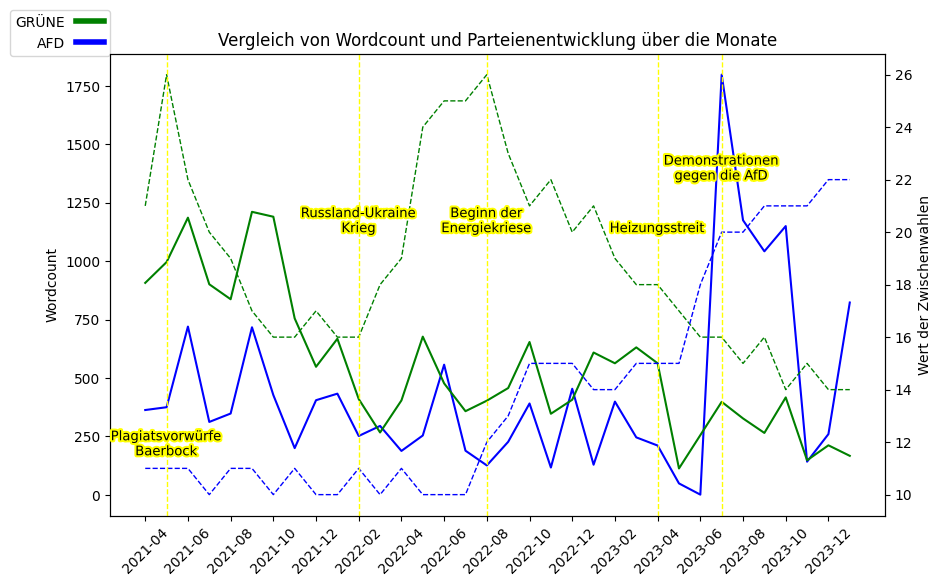

In [9]:
# Erstellen der Plot-Figur
plt.figure(figsize=(10, 6))
ax1 = plt.gca()  # ax1 ist die linke y-Achse

# Daten vorbereiten für den ersten Plot (Wordcount)
df_grouped_wordcount = pd.DataFrame()
for word in neue_parteien['word'].unique():
    temp_df = neue_parteien[neue_parteien['word'] == word].groupby('month').agg({'count': 'sum'}).reset_index()
    temp_df['word'] = word
    df_grouped_wordcount = pd.concat([df_grouped_wordcount, temp_df], ignore_index=True)

# Erster Plot (Wörter)
for word in df_grouped_wordcount['word'].unique():
    temp_df = df_grouped_wordcount[df_grouped_wordcount['word'] == word]
    color = parteifarben.get(word, 'black')
    ax1.plot(temp_df['month'], temp_df['count'], linestyle='-', color=color)

ax1.set_xlabel('')
ax1.set_ylabel('Wordcount')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(df_grouped_wordcount['month'].unique())
ax1.set_xticklabels(df_grouped_wordcount['month'].unique(), rotation=45)

# Anzeige von jedem zweiten Datum auf der x-Achse
unique_months = df_grouped_wordcount['month'].unique()
ax1.set_xticks(unique_months[::2])
ax1.set_xticklabels(unique_months[::2], rotation=45)

# Daten vorbereiten für den zweiten Plot (wahlen)
df_grouped_parties = wahlen_df.groupby('month').first().reset_index()

# Zweiter Plot (wahlen) mit zweiter y-Achse
ax2 = ax1.twinx()
party_lines = []  
for column in ['grüne','afd']:
    color = parteifarben.get(column, 'black')
    line, = ax2.plot(df_grouped_parties['month'], df_grouped_parties[column],
                     linewidth=1, linestyle="--", label=column.upper(), color=color)
    party_lines.append(line)

ax2.set_ylabel('Wert der Zwischenwahlen')
ax2.tick_params(axis='y', labelcolor='black')

# Legenden-Häkchen zu Quadraten ändern
legend_elements = [Line2D([0], [0], color=line.get_color(), lw=4, label=line.get_label()) for line in party_lines]

ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-0.138, 1.11), markerfirst=False)

# Events markieren
events = [("2021-05", "Plagiatsvorwürfe\nBaerbock", 11.5),
          ("2022-02", "Russland-Ukraine\nKrieg", 20),
          ("2023-04", "Heizungsstreit", 20),
          ("2023-07", "Demonstrationen\ngegen die AfD", 22),
          ("2022-08", "Beginn der\nEnergiekriese", 20)]

for event_x, event_label, y_position in events:
    plt.axvline(x=event_x, color='yellow', linestyle='--', linewidth=1)
    text = plt.text(event_x, y_position, event_label, rotation=0, fontsize=9.5)
    text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='yellow')])
    text.set_horizontalalignment('center')

# Plot
plt.title('Vergleich von Wordcount und Parteienentwicklung über die Monate')
plt.show()